In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
warnings.filterwarnings('ignore')

### Brief description of the data

In [2]:
wines = pd.read_csv('C:/Users/woote/Desktop/Python/IBM Machine Learning/Projects/Clustering/wine-clustering.csv')

In [3]:
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wines.shape

(178, 13)

In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wines.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## EDA

In [7]:
print(wines.shape)
print(wines.drop_duplicates().shape)

(178, 13)
(178, 13)


In [8]:
wines.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

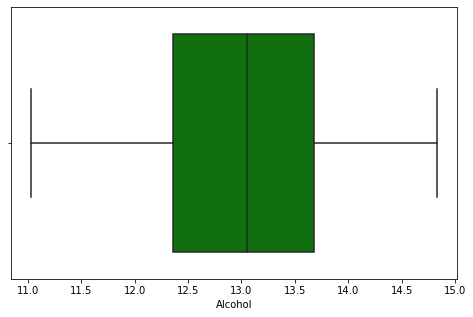

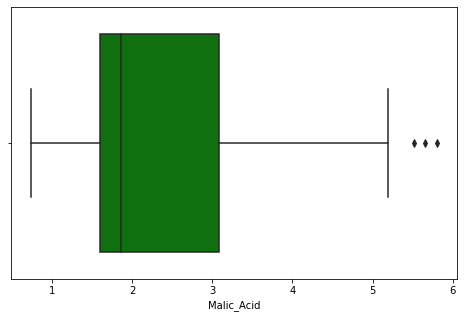

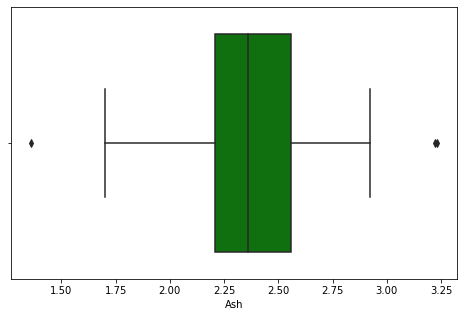

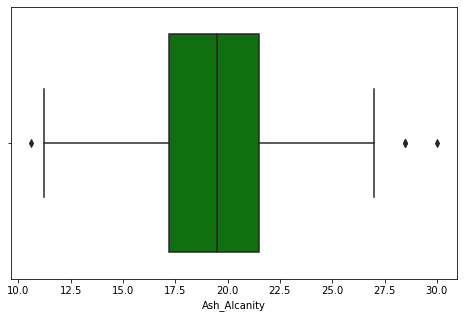

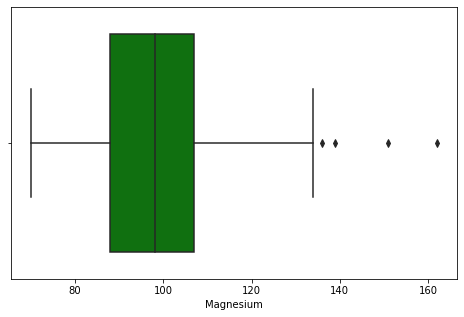

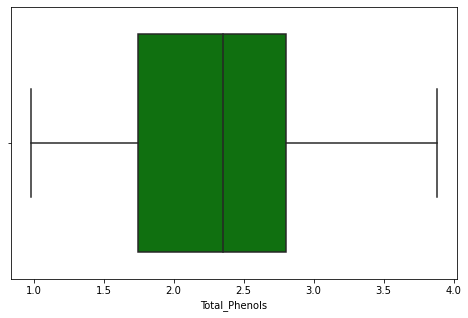

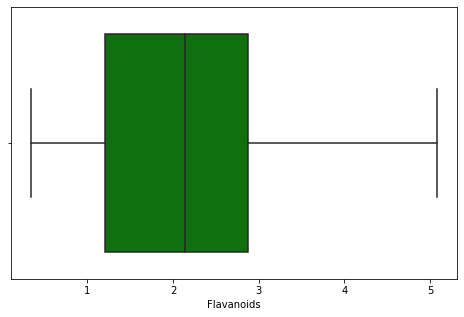

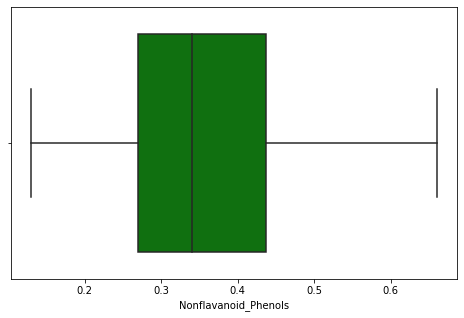

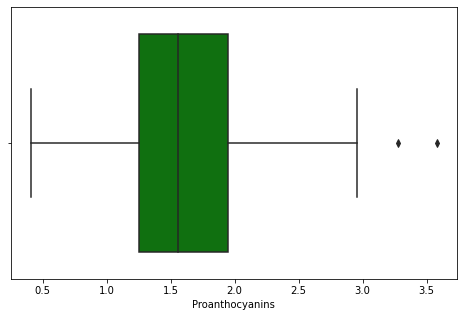

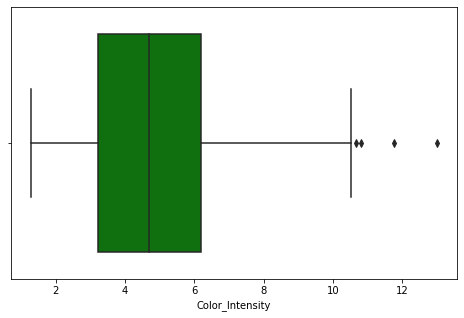

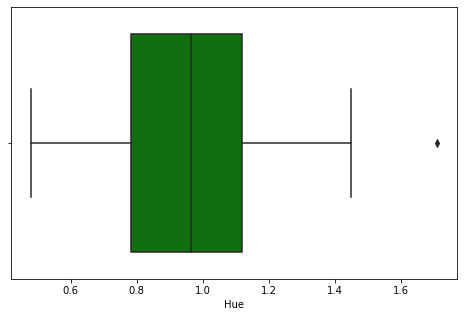

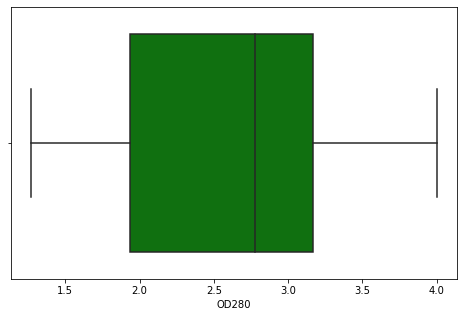

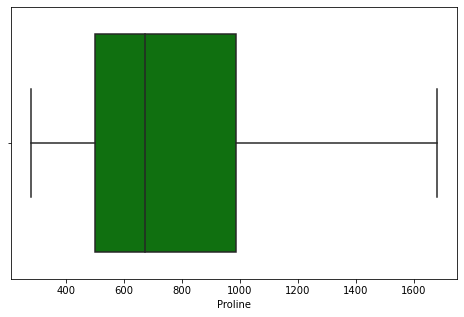

In [9]:
cols = wines.columns.values

for col in cols:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(data = wines, x = col, color = "green")
    ax.set(xlabel=col);

In [10]:
display(wines.Malic_Acid.loc[wines.Malic_Acid > 5.5])
display(wines.Ash.loc[(wines.Ash > 3) | (wines.Ash < 1.5)])
display(wines.Ash_Alcanity.loc[(wines.Ash_Alcanity > 27.5) | (wines.Ash_Alcanity < 10.5)])
display(wines.Magnesium.loc[wines.Magnesium > 138])
display(wines.Proanthocyanins.loc[wines.Proanthocyanins > 3])
display(wines.Color_Intensity.loc[wines.Color_Intensity > 10.5])
display(wines.Hue.loc[wines.Hue > 1.6])

123    5.80
137    5.51
173    5.65
Name: Malic_Acid, dtype: float64

25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64

73     30.0
121    28.5
127    28.5
Name: Ash_Alcanity, dtype: float64

69    151
73    139
95    162
Name: Magnesium, dtype: int64

95     3.28
110    3.58
Name: Proanthocyanins, dtype: float64

151    10.80
153    10.52
158    13.00
159    11.75
166    10.68
Name: Color_Intensity, dtype: float64

115    1.71
Name: Hue, dtype: float64

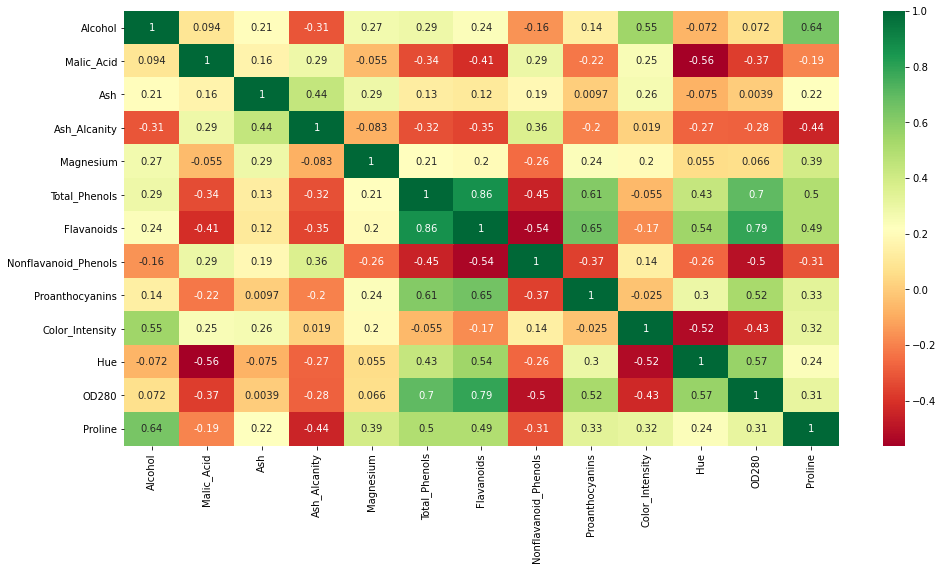

In [11]:
plt.figure(figsize=(16,8))
corr = wines.corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn");

In [12]:
for x in range(len(corr.columns)):
    corr.iloc[x,x] = 0.0
corr.abs().idxmax()

Alcohol                       Proline
Malic_Acid                        Hue
Ash                      Ash_Alcanity
Ash_Alcanity                      Ash
Magnesium                     Proline
Total_Phenols              Flavanoids
Flavanoids              Total_Phenols
Nonflavanoid_Phenols       Flavanoids
Proanthocyanins            Flavanoids
Color_Intensity               Alcohol
Hue                             OD280
OD280                      Flavanoids
Proline                       Alcohol
dtype: object

## Clustering

In [13]:
sc = StandardScaler()
wines_scaled = wines.copy()
wines_scaled[cols] = sc.fit_transform(wines[cols])

In [14]:
wines_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [15]:
wines_scaled.describe().T[['mean','std']].round(1)

,mean,std
Alcohol,-0.0,1.0
Malic_Acid,-0.0,1.0
Ash,-0.0,1.0
Ash_Alcanity,-0.0,1.0
Magnesium,-0.0,1.0
Total_Phenols,-0.0,1.0
Flavanoids,-0.0,1.0
Nonflavanoid_Phenols,0.0,1.0
Proanthocyanins,-0.0,1.0
Color_Intensity,-0.0,1.0


In [16]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust)
    km = km.fit(wines_scaled[cols])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

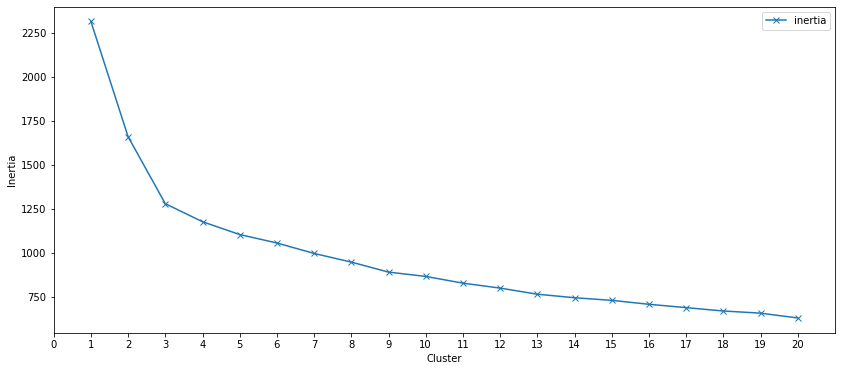

In [17]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='x',ls='-', figsize = (14,6))
ax.set_xticks(range(0,21))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [18]:
km = KMeans(n_clusters=3)
km = km.fit(wines_scaled[cols])
wines['kmeans'] = km.predict(wines_scaled[cols])
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [19]:
df1 = wines.groupby('kmeans').size().to_frame().rename(columns={0:'Cluster Size'})

df1

,Cluster Size
kmeans,
0,62
1,51
2,65


In [20]:
wines.groupby('kmeans').agg(['mean', 'std','median']).T.round(1)

kmeans                            0      1      2
Alcohol              mean      13.7   13.1   12.3
                     std        0.6    0.5    0.5
                     median    13.7   13.1   12.2
Malic_Acid           mean       2.0    3.3    1.9
                     std        0.7    1.1    1.0
                     median     1.8    3.3    1.6
Ash                  mean       2.5    2.4    2.2
                     std        0.2    0.2    0.3
                     median     2.4    2.4    2.2
Ash_Alcanity         mean      17.5   21.2   20.1
                     std        3.3    2.4    3.0
                     median    17.0   21.0   20.0
Magnesium            mean     108.0   98.7   92.7
                     std       13.2   11.1   13.7
                     median   105.5   97.0   88.0
Total_Phenols        mean       2.8    1.7    2.2
                     std        0.3    0.3    0.5
                     median     2.8    1.6    2.2
Flavanoids           mean       3.0    0.8    2.1
                     std        0.5    0.3    0.6
                     median     3.0    0.7    2.0
Nonflavanoid_Phenols mean       0.3    0.5    0.4
                     std        0.1    0.1    0.1
                     median     0.3    0.5    0.4
Proanthocyanins      mean       1.9    1.1    1.6
                     std        0.4    0.4    0.6
                     median     1.9    1.1    1.6
Color_Intensity      mean       5.5    7.2    3.0
                     std        1.3    2.3    0.8
                     median     5.4    7.3    2.9
Hue                  mean       1.1    0.7    1.1
                     std        0.1    0.1    0.2
                     median     1.1    0.7    1.0
OD280                mean       3.2    1.7    2.8
                     std        0.4    0.3    0.5
                     median     3.2    1.7    2.8
Proline              mean    1100.2  619.1  510.2
                     std      232.7  120.7  142.7
                     median  1072.5  620.0  495.0

In [21]:
cols

array(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype=object)

In [22]:
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(wines_scaled[cols])
wines['agglom_ward'] = ag.fit_predict(wines_scaled[cols])

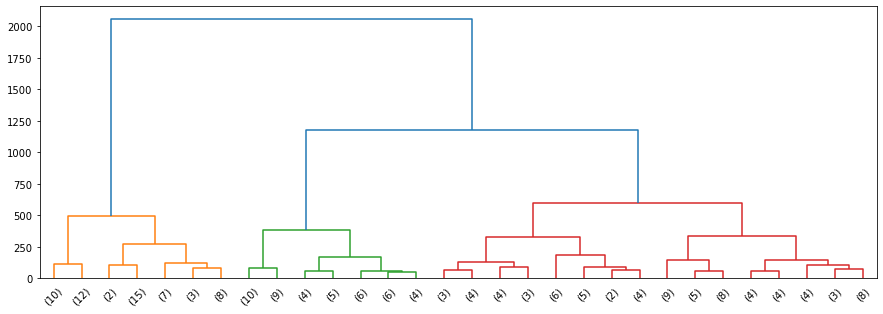

In [23]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                          color_threshold = 1000)

In [24]:
wines.drop(['kmeans'],axis=1).groupby('agglom_ward').agg(['mean', 'std','median']).T.round(1)

agglom_ward                      0      1       2
Alcohol              mean     12.2   13.1    13.7
                     std       0.5    0.6     0.6
                     median   12.2   13.1    13.7
Malic_Acid           mean      1.9    3.2     2.0
                     std       1.0    1.2     0.7
                     median    1.6    3.2     1.8
Ash                  mean      2.2    2.4     2.5
                     std       0.3    0.2     0.3
                     median    2.2    2.4     2.4
Ash_Alcanity         mean     20.2   21.0    17.5
                     std       3.0    2.5     3.4
                     median   20.0   21.0    17.0
Magnesium            mean     92.6   99.9   106.2
                     std      15.6   11.8    11.9
                     median   88.0   98.0   103.5
Total_Phenols        mean      2.3    1.7     2.8
                     std       0.5    0.4     0.3
                     median    2.2    1.6     2.8
Flavanoids           mean      2.1    0.8     3.0
                     std       0.5    0.3     0.5
                     median    2.0    0.8     3.0
Nonflavanoid_Phenols mean      0.4    0.4     0.3
                     std       0.1    0.1     0.1
                     median    0.3    0.5     0.3
Proanthocyanins      mean      1.7    1.1     1.9
                     std       0.6    0.4     0.4
                     median    1.6    1.1     1.9
Color_Intensity      mean      2.9    6.9     5.5
                     std       0.7    2.6     1.3
                     median    2.8    6.9     5.4
Hue                  mean      1.1    0.7     1.1
                     std       0.2    0.2     0.1
                     median    1.0    0.7     1.1
OD280                mean      2.9    1.7     3.2
                     std       0.4    0.3     0.4
                     median    2.9    1.7     3.2
Proline              mean    501.4  624.9  1076.0
                     std     146.0  122.5   259.8
                     median  476.0  625.0  1065.0

In [25]:
wines.groupby('agglom_ward').size().to_frame().rename(columns={0:'Cluster Size'})

,Cluster Size
agglom_ward,
0,58
1,56
2,64


In [26]:
ag_c = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_full_tree=True)
ag_c = ag_c.fit(wines_scaled[cols])
wines['agglom_complete'] = ag_c.fit_predict(wines_scaled[cols])

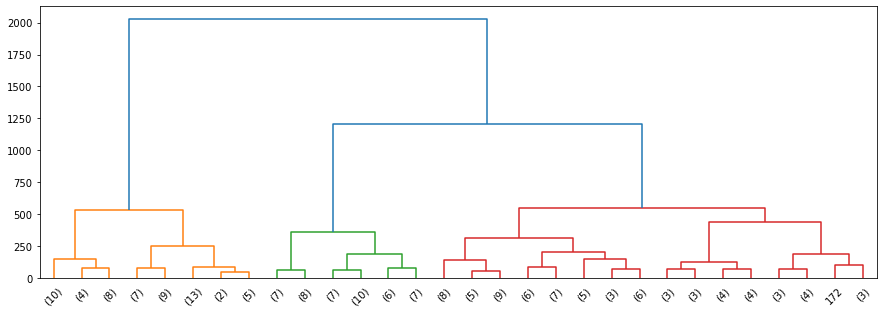

In [27]:
Z_c = hierarchy.linkage(ag_c.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z_c, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                          color_threshold = 1000)

In [28]:
wines.drop(['kmeans','agglom_ward'],axis=1).groupby('agglom_complete').agg(['mean', 'std','median']).T.round(1)

agglom_complete                   0      1      2
Alcohol              mean      13.4   12.4   13.1
                     std        0.8    0.7    0.5
                     median    13.6   12.3   13.1
Malic_Acid           mean       1.9    2.0    3.3
                     std        0.8    1.0    1.1
                     median     1.7    1.7    3.3
Ash                  mean       2.3    2.4    2.4
                     std        0.3    0.3    0.2
                     median     2.4    2.3    2.4
Ash_Alcanity         mean      16.8   21.1   21.3
                     std        2.4    2.9    2.3
                     median    16.8   20.9   21.0
Magnesium            mean     105.0   93.8   99.3
                     std       13.9   14.3   12.1
                     median   102.0   88.0   97.0
Total_Phenols        mean       2.6    2.4    1.7
                     std        0.5    0.5    0.3
                     median     2.6    2.5    1.6
Flavanoids           mean       2.7    2.3    0.8
                     std        0.7    0.7    0.3
                     median     2.8    2.2    0.7
Nonflavanoid_Phenols mean       0.3    0.4    0.4
                     std        0.1    0.1    0.1
                     median     0.3    0.4    0.5
Proanthocyanins      mean       1.8    1.7    1.2
                     std        0.6    0.4    0.4
                     median     1.9    1.6    1.1
Color_Intensity      mean       5.0    3.3    7.2
                     std        1.5    1.3    2.4
                     median     5.0    2.9    7.3
Hue                  mean       1.1    1.1    0.7
                     std        0.1    0.2    0.1
                     median     1.1    1.0    0.7
OD280                mean       3.0    3.0    1.7
                     std        0.5    0.4    0.3
                     median     3.0    3.0    1.7
Proline              mean     984.7  573.4  622.5
                     std      306.1  266.4  118.3
                     median  1035.0  484.0  625.0

In [29]:
wines.groupby('agglom_complete').size().to_frame().rename(columns={0:'Cluster Size'})

,Cluster Size
agglom_complete,
0,69
1,58
2,51


In [31]:
wines.groupby(['kmeans','agglom_ward','agglom_complete']).size().to_frame().rename(columns={0:'Cluster Size'})

Cluster Size
kmeans agglom_ward agglom_complete              
0      0           0                           1
       2           0                          51
                   1                          10
1      1           0                           1
                   2                          50
2      0           0                          10
                   1                          47
       1           0                           4
                   2                           1
       2           0                           2
                   1                           1